# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('/Users/iswetha/ironhack/dataV2-labs/module-3/Unsupervised-Learning/data/Wholesale customers data.csv')
customers

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# Your code here:
customers['Channel'].value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [4]:
customers['Region'].value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [5]:
# Each Column Meaning:
"""FRESH: annual spending (m.u.) on fresh products (Continuous);
2) MILK: annual spending (m.u.) on milk products (Continuous);
3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
7) CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
8) REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal) 
"""

'FRESH: annual spending (m.u.) on fresh products (Continuous);\n2) MILK: annual spending (m.u.) on milk products (Continuous);\n3) GROCERY: annual spending (m.u.)on grocery products (Continuous);\n4) FROZEN: annual spending (m.u.)on frozen products (Continuous)\n5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)\n6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);\n7) CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)\n8) REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal) \n'

In [6]:
# Any categorical data to convert?
customers.dtypes
"""There is no categorical data to convert in the dataset."""

'There is no categorical data to convert in the dataset.'

In [7]:
# Any missing data to remove?
"""Trying to findout any NaN values in the data but found none."""
customers.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [8]:
# Column collinearity - any high correlations?
"""Trying to find out which columns have high correlations"""
customers.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


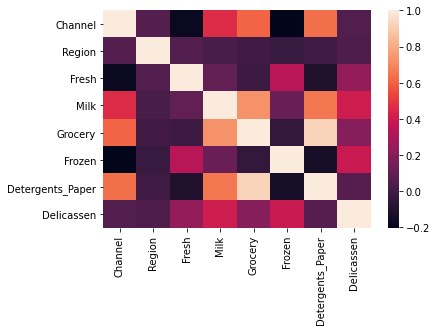

In [9]:
import seaborn as sns
sns.heatmap(customers.corr())

In [10]:
# From the correlation I findout paper and grocery has the highest correlation which is 0.924, I can remove any one of
# them but in this case I'm considering both the columns for my analysis.

In [11]:
# Descriptive statistics - any outliers to remove?
"""Yes, there are outliers for Fresh, milk, grocery, frozen, detergent_paper, delicassen and will to further analysis 
to remove it or not."""
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


<ipython-input-12-a011c42efdf0>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  customers.hist(ax=ax)


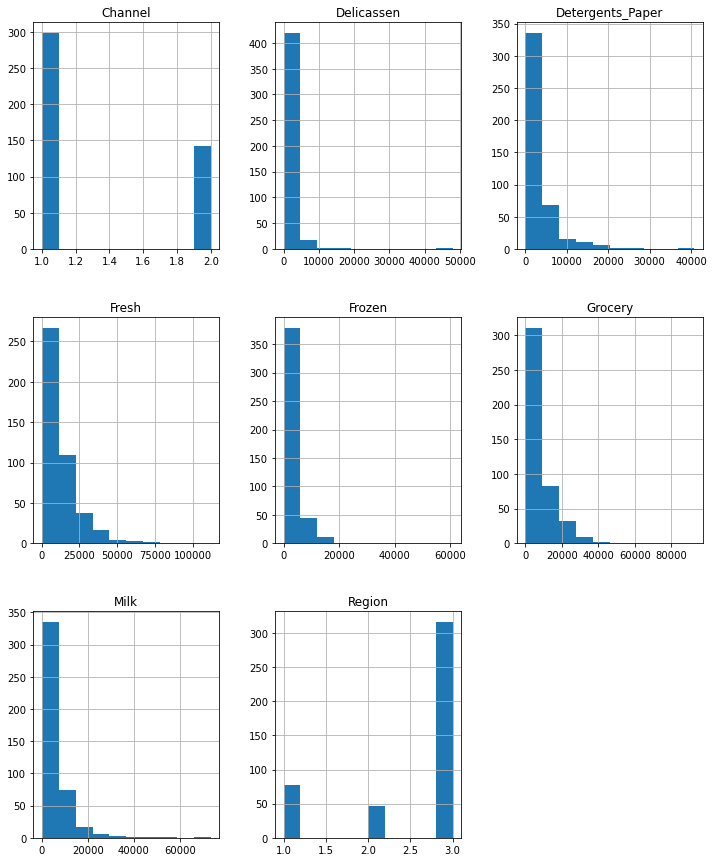

In [12]:
# Column-wise data distribution - is the distribution skewed?
fig = plt.figure(figsize = (12,15))
ax = fig.gca()
customers.hist(ax=ax)
plt.show()

In [13]:
"""From the histogram, we can see that most of the columns are left skewed."""

'From the histogram, we can see that most of the columns are left skewed.'

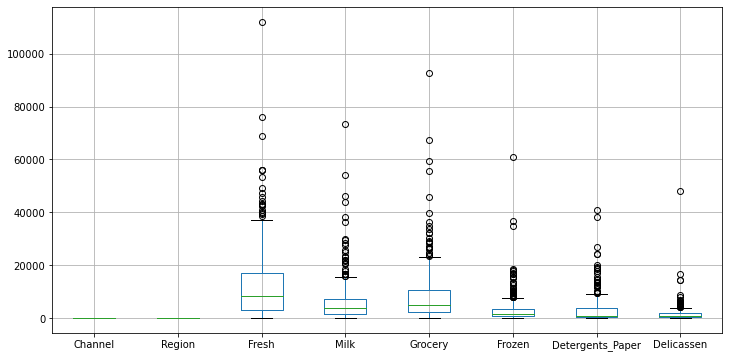

In [14]:
"""Trying the boxplot to know the outliers in the data."""
customers.boxplot(figsize=(12,6))

In [15]:
# Your observations here
"""From the boxplot we can see, Fresh column is having an outlier way more than any other columns and also every
column is having outliers, so in my analysis I want to remove the max element from every column and will perform 
operations on the cleaned data."""

'From the boxplot we can see, Fresh column is having an outlier way more than any other columns and also every\ncolumn is having outliers, so in my analysis I want to remove the max element from every column and will perform \noperations on the cleaned data.'

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [16]:
# Your code here
"""Trying to remove the max element from every column."""
customers.loc[customers[['Milk', 'Fresh', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].idxmax()]
customers = customers.drop([86, 181, 85, 325, 183])
customers

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


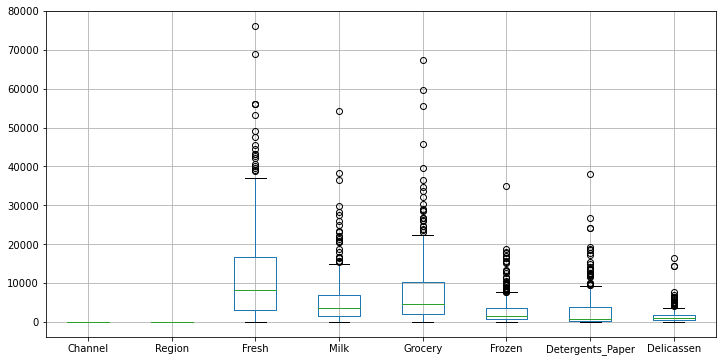

In [17]:
"""After removing the max element that is the outlier from the data."""
customers.boxplot(figsize=(12,6))

In [18]:
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,1.321839,2.540230,11630.744828,5380.002299,7636.147126,2840.204598,2759.772414,1390.790805
std,0.467720,0.777041,11654.374150,5971.679533,8524.526125,3613.604752,4353.065698,1704.203121
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3100.000000,1520.500000,2146.500000,728.500000,256.500000,405.500000
50%,1.000000,3.000000,8258.000000,3610.000000,4740.000000,1517.000000,811.000000,961.000000
75%,2.000000,3.000000,16718.000000,7086.000000,10431.000000,3512.500000,3886.000000,1782.000000
max,2.000000,3.000000,76237.000000,54259.000000,67298.000000,35009.000000,38102.000000,16523.000000


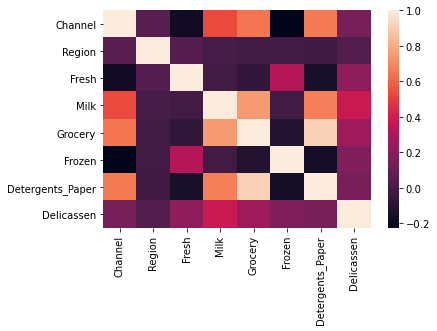

In [19]:
sns.heatmap(customers.corr())

In [20]:
customers.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.059391,-0.170321,0.535268,0.649499,-0.224901,0.662047,0.145779
Region,0.059391,1.000000,0.046938,0.004336,-0.011303,-0.019098,-0.019316,0.035856
Fresh,-0.170321,0.046938,1.000000,-0.013791,-0.063354,0.323822,-0.143993,0.216844
Milk,0.535268,0.004336,-0.013791,1.000000,0.748375,-0.011259,0.671349,0.382676
Grocery,0.649499,-0.011303,-0.063354,0.748375,1.000000,-0.112060,0.916588,0.258842
Frozen,-0.224901,-0.019098,0.323822,-0.011259,-0.112060,1.000000,-0.158500,0.169273
Detergents_Paper,0.662047,-0.019316,-0.143993,0.671349,0.916588,-0.158500,1.000000,0.147055
Delicassen,0.145779,0.035856,0.216844,0.382676,0.258842,0.169273,0.147055,1.000000


In [21]:
# Your comment here
"""Removed the outliers from my data as the spread is way too much before but now it is considerable."""

'Removed the outliers from my data as the spread is way too much before but now it is considerable.'

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd77cc8eb50>,
      dtype=object)

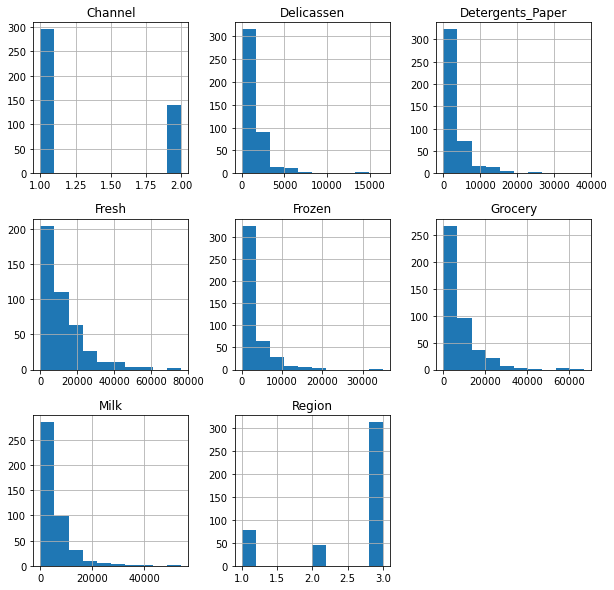

In [22]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:

scale = StandardScaler()
scale.fit(customers)
customers_scale = scale.fit_transform(customers)
customers.hist(figsize=[10,10])

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [23]:
# Your code here:
from sklearn.cluster import KMeans
X = customers_scale
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
customers['labels'] = kmeans.labels_

Count the values in `labels`.

In [24]:
# Your code here:
customers['labels'].value_counts()

3    240
1    120
2     56
0     19
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [25]:
# Your code here
from sklearn.cluster import DBSCAN
X = customers_scale
clustering = DBSCAN(eps=0.5, min_samples=4).fit(X)
customers['labels_DBSCAN'] = clustering.labels_

Count the values in `labels_DBSCAN`.

In [26]:
# Your code here
customers['labels_DBSCAN'].value_counts()

-1    298
 0    101
 2     13
 1      6
 5      5
 6      4
 4      4
 3      4
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

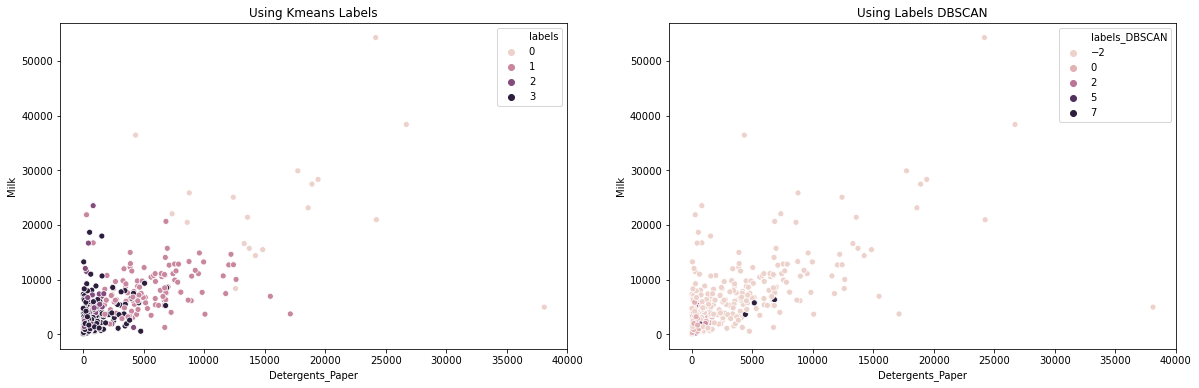

In [27]:
# Your code here:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,6))

ax1.set_title('Using Kmeans Labels')
sns.scatterplot(x='Detergents_Paper', y='Milk', data=customers, hue = 'labels',ax=ax1)

ax2.set_title('Using Labels DBSCAN')
sns.scatterplot(x='Detergents_Paper', y='Milk', data=customers, hue = 'labels_DBSCAN', ax=ax2)

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

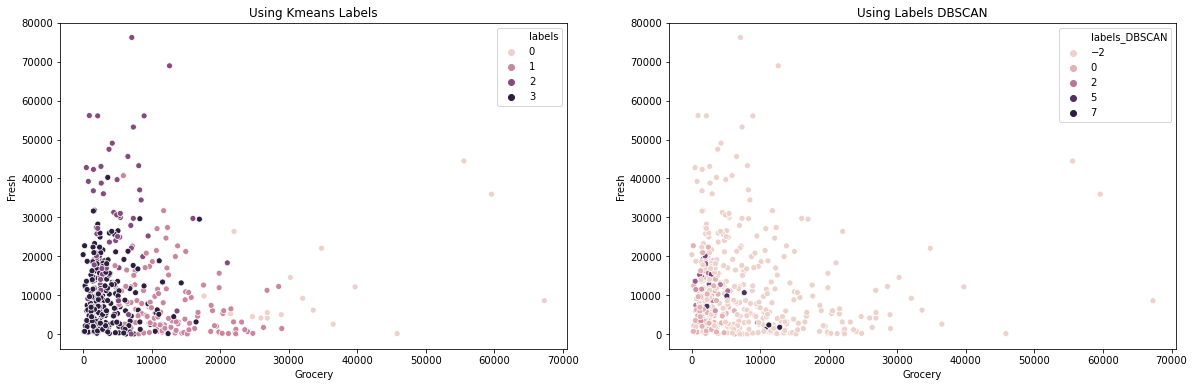

In [28]:
# Your code here:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,6))

ax1.set_title('Using Kmeans Labels')
sns.scatterplot(x='Grocery', y='Fresh', data=customers, hue = 'labels',ax=ax1)

ax2.set_title('Using Labels DBSCAN')
sns.scatterplot(x='Grocery', y='Fresh', data=customers, hue = 'labels_DBSCAN', ax=ax2)

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

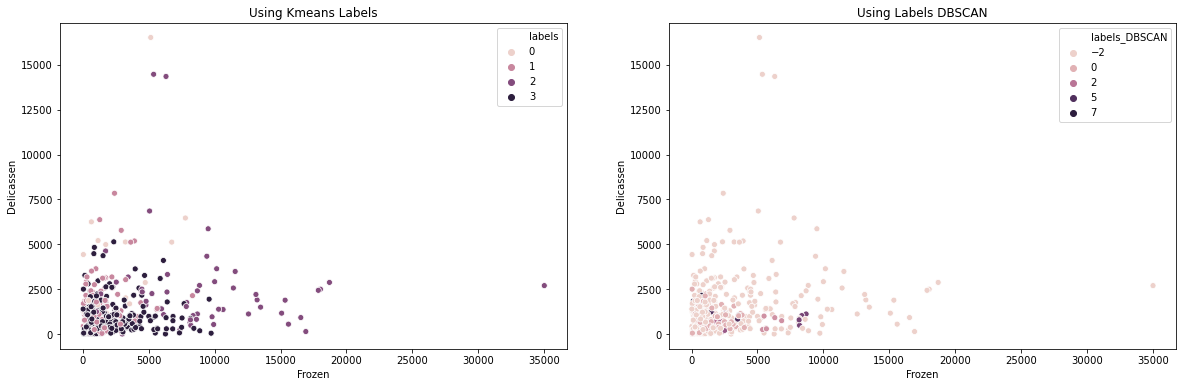

In [29]:
# Your code here:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,6))

ax1.set_title('Using Kmeans Labels')
sns.scatterplot(x='Frozen', y='Delicassen', data=customers, hue = 'labels',ax=ax1)

ax2.set_title('Using Labels DBSCAN')
sns.scatterplot(x='Frozen', y='Delicassen', data=customers, hue = 'labels_DBSCAN', ax=ax2)

In [30]:
# Your code here:
customers.groupby(['labels', 'labels_DBSCAN']).mean()


Channel    Region         Fresh          Milk  \
labels labels_DBSCAN                                                   
0      -1             2.000000  2.473684  11595.631579  23646.421053   
1      -1             1.982759  2.603448   8049.853448   8214.344828   
        6             2.000000  3.000000   2090.000000   5580.250000   
2      -1             1.057692  2.653846  30097.884615   4556.711538   
        4             1.000000  3.000000  16858.000000   2147.750000   
3      -1             1.000000  2.216216  10976.801802   3941.126126   
        0             1.000000  3.000000   7781.673267   1787.009901   
        1             1.000000  3.000000   8184.166667   1746.500000   
        2             1.000000  1.000000   8324.923077   2340.076923   
        3             1.000000  1.000000  15396.500000    744.500000   
        5             1.000000  2.000000   8220.600000   1692.600000   

                           Grocery       Frozen  Detergents_Paper   Delicassen  
labels labels_DBSCAN                                                            
0      -1             34182.263158  2459.789474      16400.736842  3706.894737  
1      -1             13048.560345  1441.568966       5550.258621  1448.456897  
        6             11095.500000   663.500000       5105.000000  1957.000000  
2      -1              5330.230769  8991.423077        702.307692  2520.326923  
        4              2238.750000  8354.500000        519.500000   854.250000  
3      -1              4800.504505  2617.351351       1203.027027  1231.918919  
        0              2283.158416  1519.574257        428.257426   690.900990  
        1              1560.500000  5894.000000        365.666667   585.666667  
        2              2207.000000  1208.000000        365.769231   473.076923  
        3              1263.750000  2222.500000        140.750000   692.500000  
        5              4311.000000  2788.800000        347.400000  1056.400000

Which algorithm appears to perform better?

In [31]:
# Your observations here
"""I would prefer kmeans as DBSCAN leaves out the outliers and doesnot include them in any of the clusters."""

'I would prefer kmeans as DBSCAN leaves out the outliers and doesnot include them in any of the clusters.'

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [32]:
# Your code here
# Using 2 clusters
from sklearn.cluster import KMeans
X = customers_scale
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
customers['labels'] = kmeans.labels_

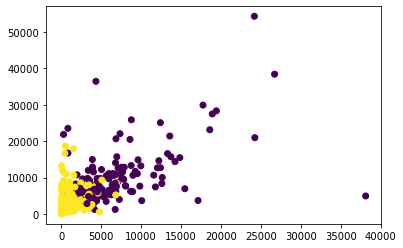

In [33]:
plt.scatter(x = customers['Detergents_Paper'],y = customers['Milk'], c = customers['labels'])

In [34]:
# Using 3 clusters
X = customers_scale
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
customers['labels'] = kmeans.labels_

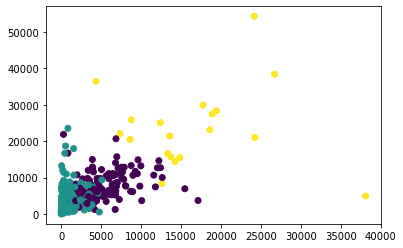

In [35]:
plt.scatter(x = customers['Detergents_Paper'],y = customers['Milk'], c = customers['labels'])

In [36]:
# Using 4 clusters
X = customers_scale
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
customers['labels'] = kmeans.labels_

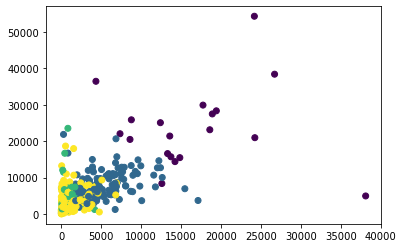

In [37]:
plt.scatter(x = customers['Detergents_Paper'],y = customers['Milk'], c = customers['labels'])

In [38]:
# Using 5 clusters
X = customers_scale
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
customers['labels'] = kmeans.labels_

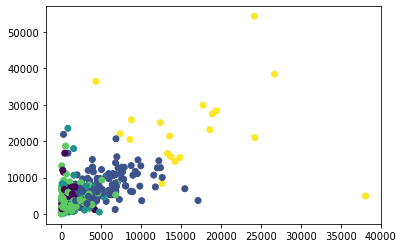

In [39]:
plt.scatter(x = customers['Detergents_Paper'],y = customers['Milk'], c = customers['labels'])

In [40]:
# Your comment here
"""Number of clusters = 3 giving a clear idea about the plots"""

'Number of clusters = 3 giving a clear idea about the plots'

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [41]:
# Your code here

X = customers_scale
clustering = DBSCAN(eps=0.1, min_samples=4).fit(X)
customers['labels_DBSCAN'] = clustering.labels_

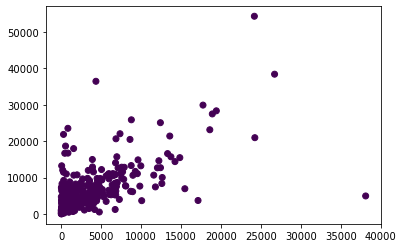

In [42]:
plt.scatter(x = customers['Detergents_Paper'],y = customers['Milk'], c = customers['labels_DBSCAN'])

In [43]:
X = customers_scale
clustering = DBSCAN(eps=0.2, min_samples=4).fit(X)
customers['labels_DBSCAN'] = clustering.labels_

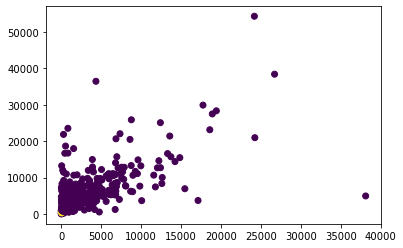

In [44]:
plt.scatter(x = customers['Detergents_Paper'],y = customers['Milk'], c = customers['labels_DBSCAN'])

In [45]:
X = customers_scale
clustering = DBSCAN(eps=1, min_samples=4).fit(X)
customers['labels_DBSCAN'] = clustering.labels_

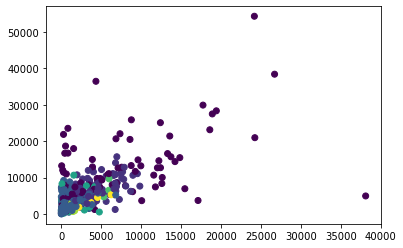

In [46]:
plt.scatter(x = customers['Detergents_Paper'],y = customers['Milk'], c = customers['labels_DBSCAN'])

In [50]:
X = customers_scale
clustering = DBSCAN(eps=2, min_samples=4).fit(X)
customers['labels_DBSCAN'] = clustering.labels_

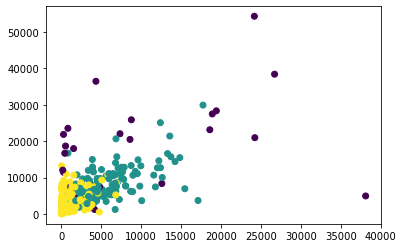

In [51]:
plt.scatter(x = customers['Detergents_Paper'],y = customers['Milk'], c = customers['labels_DBSCAN'])

In [52]:
# Your comment here
"""If I give eps less than 1 there is no major difference between them but when I give 1 or 2 then I can see more number of clusters."""

'If I give eps less than 1 there is no major difference between them but when I give 1 or 2 then I can see more number of clusters.'